# A.2 Datos abiertos de la CDMX

## 1. ¿Qué pruebas identificarías para asegurar la calidad de estos datos?

Hay varios pasos a seguir, y en general es caso por caso. Revisar la calidad de los datos no es un paso previo al análisis de datos: es analisis de datos. Dicho esto, hay pasos generales a seguir.

* Hacer una exploración general de los datos
    * Determinar qué significa cada columna
    * Cuáles son los campos cualitativos y cuáles los cuantitativos
    * Tipo de entradas (numéricos, alfanuméricos, booleanos, categóricos, int, float, timestamp, etc.)
* Verificar datos nulos
    * Dependiendo de la cantidad, se pueden descartar, capturar de registros completos (por ejemplo una colonia sin estado en un registro que sí lo tiene en otro) o interpolar.
* Verificar outliers
    * Este proceso nos ayuda a quitar el ruido. Datos mal capturados, anomalías, etc.
* Verificar duplicados
* Consistencia en los categóricos.
    * Entradas con acentos o sin acentos, por ejemplo, que producen dos categorías en vez de una. También ocurre con los espacios en blanco.    

## 2. ¿Cuántos delitos registrados hay en la tabla? ¿Qué rango de tiempo consideran los datos?

La siguiente celda extrae la información del poortal de datos de la CDMX. Si los documentos ya existen, no los vuelve a descargar.

In [1]:
import os.path
import wget

if not os.path.exists('carpetas-de-investigacion-pgj-cdmx.csv'):
    wget.download(
        'https://datos.cdmx.gob.mx/explore/dataset/carpetas-de-investigacion-pgj-cdmx/download/?format=csv&timezone=America/Mexico_City&lang=es&use_labels_for_header=true&csv_separator=%2C',
        'carpetas-de-investigacion-pgj-cdmx.csv'
    )

if not os.path.exists('carpetas-de-investigacion-pgj-cdmx.geojson'):
    wget.download(
        'https://datos.cdmx.gob.mx/explore/dataset/carpetas-de-investigacion-pgj-cdmx/download/?format=geojson&timezone=America/Mexico_City&lang=es',
        'carpetas-de-investigacion-pgj-cdmx.geojson'
    )

Una vez obtenidos los datos, los cargamos a un `DataFrame` de pandas` y eliminamos aquellos que no son parte de la CDMX.

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('carpetas-de-investigacion-pgj-cdmx.csv')
df = df[
    df['alcaldia_hechos'].isin(
        [
            'COYOACAN',
            'MIGUEL HIDALGO',
            'LA MAGDALENA CONTRERAS',
            'TLAHUAC',
            'AZCAPOTZALCO',
            'IZTACALCO',
            'ALVARO OBREGON',
            'XOCHIMILCO',
            'VENUSTIANO CARRANZA',
            'TLALPAN',
            'CUAJIMALPA DE MORELOS',
            'CUAUHTEMOC',
            'IZTAPALAPA',
            'MILPA ALTA',
            'BENITO JUAREZ',
            'GUSTAVO A MADERO',
        ]
    )
]

A continuación, mostramos cómo se ven los datos.

In [4]:
display(df.head())

,año_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalía,agencia,unidad_investigacion,colonia_hechos,alcaldia_hechos,fecha_inicio,mes_inicio,ao_inicio,calle_hechos,calle_hechos2,longitud,latitud,Geopoint
0,2016.0,Enero,2016-01-05 17:00:00,LESIONES CULPOSAS,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN GUSTAVO A. MADERO,GAM-6,UI-1CD,GRANJAS MODERNAS,GUSTAVO A MADERO,2016-01-05 18:35:37,Enero,2016,SAN JUAN DE ARAGON,CALLE ANZAR,-99.103527,19.481076,"19.4810759998,-99.103527"
2,2017.0,Noviembre,2017-11-01 16:40:00,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,INVESTIGACIÓN EN IZTACALCO,IZC-2,UI-1SD,GABRIEL RAMOS MILLÁN SECCIÓN TLACOTAL,IZTACALCO,2017-11-01 16:56:04,Noviembre,2017,SUR 117,ORIENTE 100A,-99.106072,19.395398,"19.3953976727,-99.1060723829"
3,2015.0,Diciembre,2015-12-30 20:00:00,FRAUDE,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN IZTAPALAPA,IZP-8,UI-1CD,CONSEJO AGRARISTA MEXICANO,IZTAPALAPA,2016-01-05 21:12:42,Enero,2016,CUARTA CERRADA DE FRESNO,ENCINO (SIN REGISTRO DEL SAP),-99.055887,19.322458,"19.3224579998,-99.055887"
4,2018.0,Mayo,2018-05-16 16:00:00,ROBO A REPARTIDOR CON VIOLENCIA,ROBO A REPARTIDOR CON Y SIN VIOLENCIA,INVESTIGACIÓN EN IZTAPALAPA,IZP-9,UI-2SD,DESARROLLO URBANO QUETZALCOATL,IZTAPALAPA,2018-05-22 10:44:45,Mayo,2018,TARASCO,ZAPOTECO,-99.042786,19.319141,"19.3191405147,-99.0427862526"
5,2018.0,Mayo,2018-05-21 20:40:00,ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN CUAUHTEMOC,CUH-2,UI-2SD,INFONAVIT IZTACALCO,IZTACALCO,2018-05-22 10:52:18,Mayo,2018,FRANCISCO DEL PASO Y TRONCOSO,ISLA,-99.111563,19.386594,"19.3865939284,-99.1115626682"


Observemos que las columnas de fechas no están en el tipo adecuado, por lo que las convertimos.

In [5]:
df.dtypes

año_hechos              float64
mes_hechos               object
fecha_hechos             object
delito                   object
categoria_delito         object
fiscalía                 object
agencia                  object
unidad_investigacion     object
colonia_hechos           object
alcaldia_hechos          object
fecha_inicio             object
mes_inicio               object
ao_inicio                 int64
calle_hechos             object
calle_hechos2            object
longitud                float64
latitud                 float64
Geopoint                 object
dtype: object

In [6]:
df.fecha_hechos = df.fecha_hechos.astype('datetime64')
df.fecha_inicio = df.fecha_inicio.astype('datetime64')

Establecemos `fecha_hechos` como el índice principal de `df`.

In [7]:
df.set_index('fecha_hechos', inplace=True)

## 3. ¿Cómo se distribuye el número de delitos en la CDMX? ¿Cuáles son los 5 delitos más frecuentes?

Una vez procesados los datos, podemos determinar cuántos delitos hay en `df` y qué fechas comprenden.

In [8]:
print(
    'Número de delitos:\n\t{}\nRango de tiempo:\n\t{} a {}'.format(
        len(df),
        df.index.min(),
        df.index.max()
    )
)

Número de delitos:
	800207
Rango de tiempo:
	1906-06-02 19:00:00 a 2019-06-30 23:00:00


También podemos determinar cuántos delitos han ocurrido por alcaldía en ese periodo

In [9]:
del_tot_alcaldia_df = pd.DataFrame(df.groupby('alcaldia_hechos').size()).rename(
    columns = { 0: 'no_delitos'}
).sort_values(by='no_delitos', ascending=False)

display(
    del_tot_alcaldia_df
)

,no_delitos
alcaldia_hechos,
CUAUHTEMOC,131397
IZTAPALAPA,119926
GUSTAVO A MADERO,80097
BENITO JUAREZ,70599
COYOACAN,54235
MIGUEL HIDALGO,53688
ALVARO OBREGON,52568
VENUSTIANO CARRANZA,46224
TLALPAN,46179


Y cuáles son los más frecuentes.

In [10]:
del_tot_delito_df = pd.DataFrame(df.groupby('delito').size()).rename(
    columns = { 0: 'no_delitos'}
).sort_values(by='no_delitos', ascending=False)

display(
    del_tot_delito_df
)

,no_delitos
delito,
VIOLENCIA FAMILIAR,69007
ROBO DE OBJETOS,51870
ROBO A NEGOCIO SIN VIOLENCIA,51396
FRAUDE,44826
DENUNCIA DE HECHOS,43613
...,...
CONTRA LA LEY GENERAL DE EXPLOSIVOS,1
CONTAGIO VENERERO,1
DDH INCOMPETENCIA,1


Podemos ver como se distribuyen los 10 delitos más frecuentes por delegación.

In [11]:
tot_del_alcaldia_del = df[['delito', 'alcaldia_hechos']].pivot_table(
    index=['alcaldia_hechos'],
    columns=['delito'],
    values=['delito'],
    aggfunc=len
).fillna(0)[
    del_tot_delito_df.index[:16]
]
display(tot_del_alcaldia_del)

delito,VIOLENCIA FAMILIAR,ROBO DE OBJETOS,ROBO A NEGOCIO SIN VIOLENCIA,FRAUDE,DENUNCIA DE HECHOS,AMENAZAS,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA,ROBO DE ACCESORIOS DE AUTO,ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO,ROBO A CASA HABITACION SIN VIOLENCIA,FALSIFICACION DE TITULOS AL PORTADOR Y DOCUMENTOS DE CREDITO PUBLICO,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VIOLENCIA,ROBO A TRANSEUNTE DE CELULAR SIN VIOLENCIA,ABUSO DE CONFIANZA,DAÑO EN PROPIEDAD AJENA CULPOSA POR TRÁNSITO VEHICULAR A AUTOMOVIL
alcaldia_hechos,,,,,,,,,,,,,,,,
ALVARO OBREGON,5094.0,3091.0,3242.0,2595.0,2980.0,2464.0,1364.0,2139.0,1267.0,2139.0,1281.0,1715.0,1400.0,956.0,832.0,1076.0
AZCAPOTZALCO,3116.0,2639.0,3293.0,1691.0,1447.0,2288.0,1173.0,2416.0,1311.0,1760.0,1086.0,925.0,1281.0,765.0,675.0,661.0
BENITO JUAREZ,2832.0,4419.0,6076.0,6461.0,3309.0,2452.0,1224.0,2293.0,6030.0,2813.0,2422.0,4068.0,1483.0,2390.0,1732.0,1217.0
COYOACAN,4570.0,3870.0,3919.0,3002.0,3274.0,2583.0,1277.0,1594.0,2056.0,2475.0,1795.0,2481.0,1652.0,954.0,847.0,1118.0
CUAJIMALPA DE MORELOS,1195.0,791.0,903.0,770.0,435.0,455.0,122.0,85.0,150.0,367.0,389.0,333.0,161.0,65.0,294.0,302.0
CUAUHTEMOC,5640.0,10291.0,8095.0,11863.0,9216.0,5129.0,5432.0,4187.0,3981.0,2462.0,2139.0,3662.0,1194.0,6051.0,1891.0,1412.0
GUSTAVO A MADERO,7509.0,4278.0,5560.0,3070.0,4170.0,3548.0,3110.0,1987.0,2551.0,1781.0,2263.0,1536.0,2731.0,1425.0,1193.0,1059.0
IZTACALCO,4348.0,1919.0,1072.0,1322.0,1988.0,1633.0,1312.0,1738.0,1042.0,1164.0,984.0,562.0,942.0,961.0,551.0,579.0
IZTAPALAPA,13277.0,7115.0,8026.0,3524.0,6295.0,6069.0,6178.0,4720.0,1914.0,2390.0,2886.0,1788.0,3583.0,1746.0,1497.0,1480.0


## 4. Identifica los delitos que van a la alza y a la baja en la CDMX en el último año (ten cuidado con los delitos con pocas ocurrencias).

Para identificar tendencias, primero construimos las series de tiempo de cada delito. Por simplicidad, vamos a agrupar por día, pero esto no es necesario. Acomodamos las series de delito más frecuente a menos frecuente.

In [12]:
st_por_delito_df = df[df.index >= '2018-06-30'][
    ['delito']
].pivot_table(
    index=['fecha_hechos'],
    columns=['delito'],
    values=['delito'],
    aggfunc=len
).fillna(0).resample('D', level=0).sum()

st_por_delito_df = st_por_delito_df[
    [
        col for col in del_tot_delito_df.index if col in st_por_delito_df.columns
    ]
]

In [13]:
display(st_por_delito_df)

delito,VIOLENCIA FAMILIAR,ROBO DE OBJETOS,ROBO A NEGOCIO SIN VIOLENCIA,FRAUDE,DENUNCIA DE HECHOS,AMENAZAS,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA,ROBO DE ACCESORIOS DE AUTO,ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO,...,DELITOS CONTRA LA SALUD,DENUNCIA DE HECHOS POR ROBO DE CELULAR,VIOLACION TUMULTUARIA EQUIPARADA POR CONOCIDO,CALUMNIAS,PERDIDA DE LA VIDA POR ENVENENAMIENTO,ROBO DE VEHICULO Y NOMINA CON VIOLENCIA,LENOCINIO,ASOCIACION DELICTUOSA,CONTAGIO VENERERO,EXHORTOS
fecha_hechos,,,,,,,,,,,,,,,,,,,,,
2018-06-30,55.0,39.0,31.0,21.0,50.0,22.0,25.0,39.0,15.0,22.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-07-01,56.0,30.0,18.0,27.0,31.0,43.0,13.0,13.0,18.0,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-07-02,61.0,26.0,42.0,35.0,42.0,30.0,19.0,44.0,27.0,34.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-07-03,53.0,41.0,48.0,34.0,33.0,20.0,17.0,46.0,30.0,27.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-07-04,52.0,56.0,33.0,44.0,46.0,24.0,25.0,42.0,26.0,32.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-26,46.0,21.0,41.0,20.0,0.0,28.0,26.0,0.0,24.0,21.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-06-27,28.0,28.0,34.0,16.0,0.0,12.0,21.0,0.0,26.0,21.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-06-28,30.0,16.0,27.0,7.0,0.0,10.0,30.0,0.0,21.0,19.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Veamos cómo se comoportan los 20 delitos más frecuentes.

In [14]:
from matplotlib import pyplot as plt
import matplotlib.dates as mdates

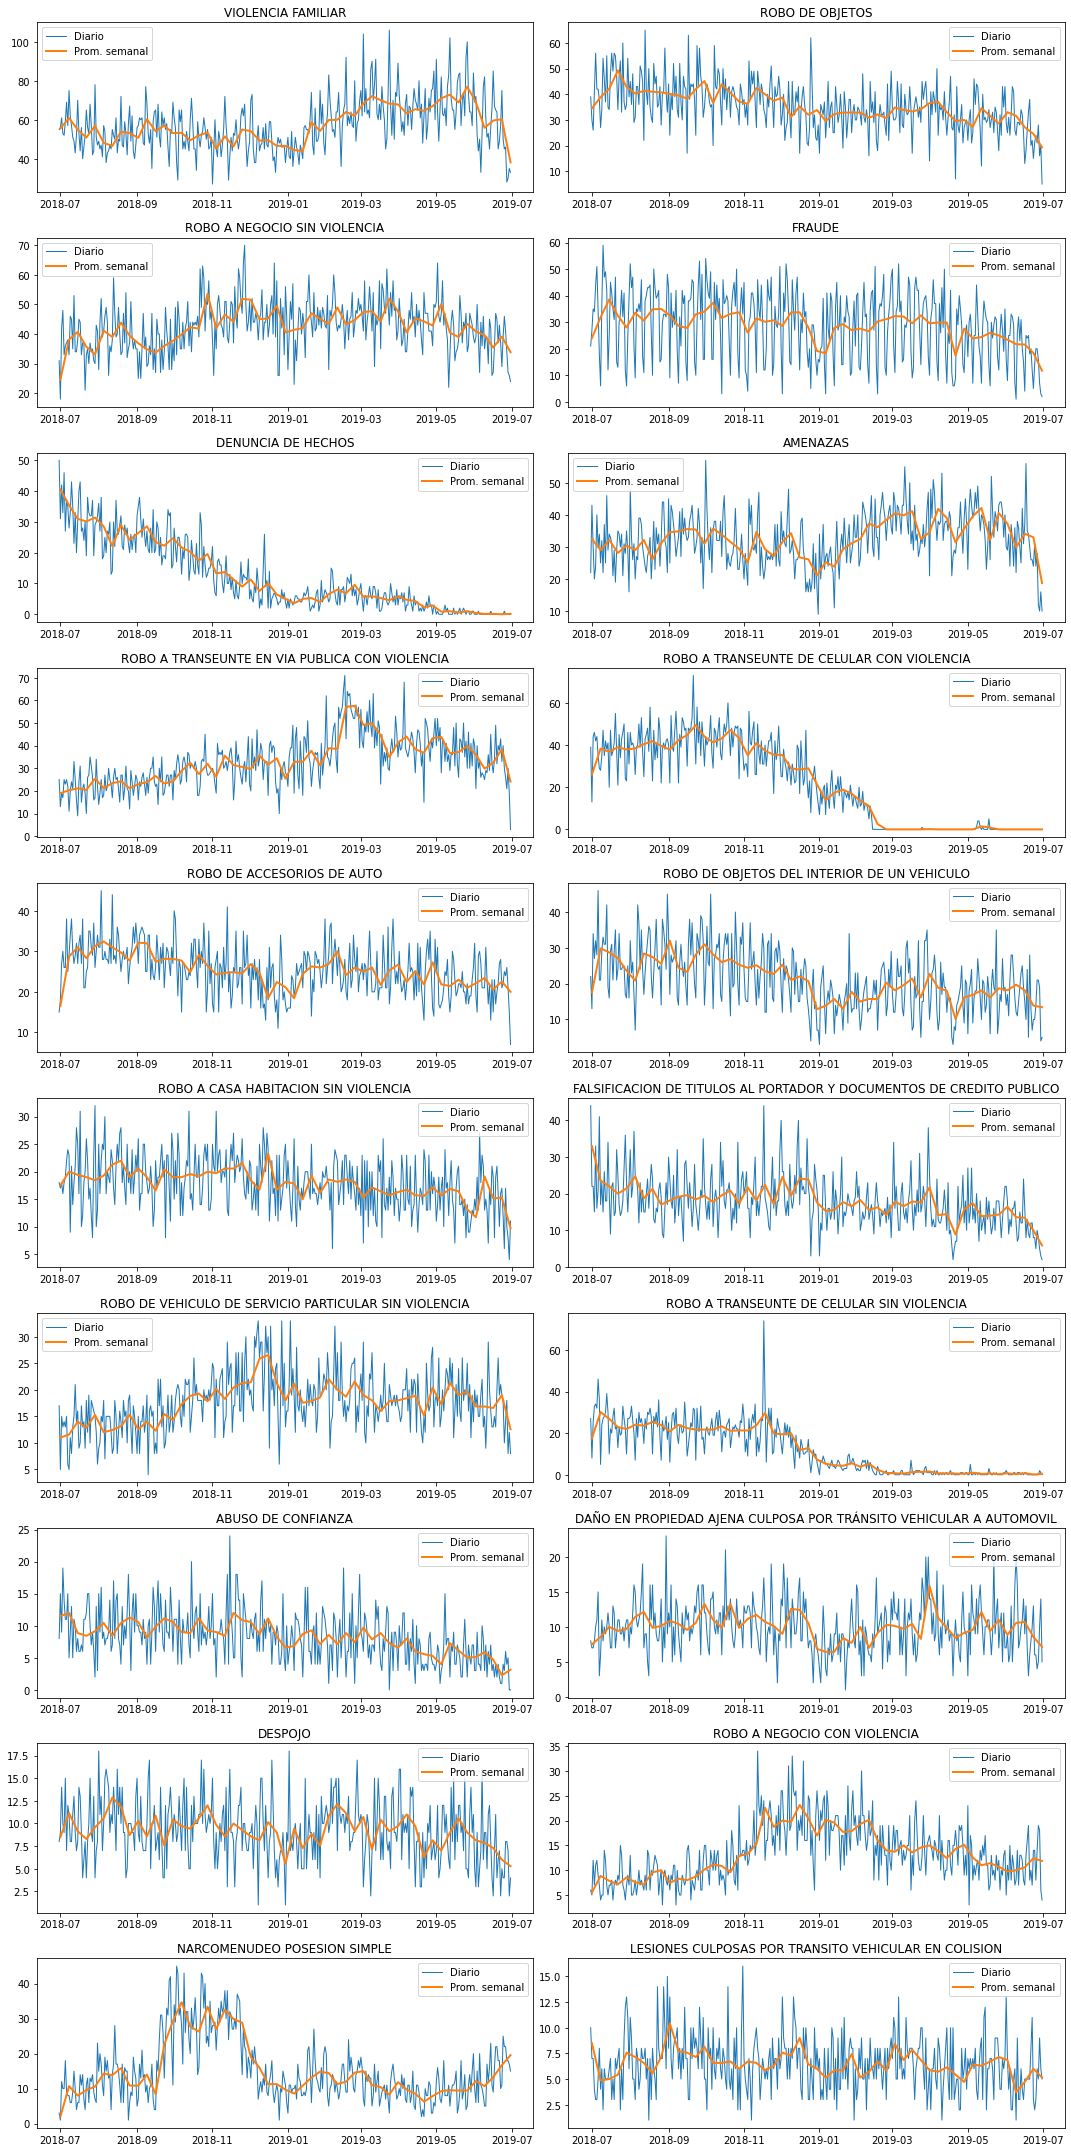

In [15]:
fig, axs = plt.subplots(10, 2, figsize=(15,30))
for i, ax in enumerate(axs.flatten()):
    ax.plot(
        st_por_delito_df.iloc[:,i],
        linewidth=1,
        label='Diario'
    )
    ax.plot(
        st_por_delito_df.iloc[:,i].resample('W').mean(),
        linewidth=2,
        label='Prom. semanal'
    )
    ax.set_title(
        st_por_delito_df.columns[i]
    )
    ax.legend()

fig.tight_layout()
plt.show()
plt.close()

Para determinar las tendencias de cada delito, vamos a usar el modelo `Prophet`, desarrollado por facebook, que propone una descomposición de la serie en *tendencia*, *estacionalidad*, *efectos de días festivos* y cambios aleatorios (ver [Prophet](https://facebook.github.io/prophet/)).

Por simplicidad, solo vamos a considerar los 50 delitos más frecuentes.

In [16]:
from fbprophet import Prophet

In [17]:
param_delito = []

predicciones = {}
tendencias = {}

for col in st_por_delito_df.columns[:50]:
    ph_df = st_por_delito_df[
        [col]
    ].reset_index().rename(
        columns = {
            'fecha_hechos': 'ds',
            col: 'y'
        }
    )
    
    m = Prophet(
        daily_seasonality=False,
        yearly_seasonality=True)
    m.fit(ph_df)
    
    futuro = m.make_future_dataframe(
        periods=60,
        freq='D',
    )
    prediccion = m.predict(futuro)
    
    predicciones[col] = prediccion
    
    tendencia = prediccion[
        ['ds', 'trend']
    ].rename(
        columns={'ds': 'fecha_hechos', 'trend': 'tendencia'}
    ).set_index('fecha_hechos')
    
    tendencias[col] = tendencia
    
    pendiente = (
        tendencia.tendencia[-1] - tendencia.tendencia[0]
    ) / (
        tendencia.index[-1]-tendencia.index[0]
    ).days
    
    param_delito.append([
        col,
        (
            del_tot_delito_df[
                del_tot_delito_df.index == col
            ] /len(df)
        ).iloc[0][0],
        pendiente
    ])    

Con la rutina anterior calculamos el porcentaje de tendencia, que vamos a incorporar al resumen de delitos `del_tot_delito_df`.

In [18]:
del_tot_delito_df = del_tot_delito_df.merge(
    pd.DataFrame(
        param_delito,
        columns=['delito', 'val_relativo', 'm_tendencia']
    ).set_index('delito'),
    left_index=True, right_index=True
)

In [19]:
display(del_tot_delito_df)

,no_delitos,val_relativo,m_tendencia
delito,,,
VIOLENCIA FAMILIAR,69007,0.086236,-0.048221
ROBO DE OBJETOS,51870,0.064821,-0.066330
ROBO A NEGOCIO SIN VIOLENCIA,51396,0.064228,-0.003719
FRAUDE,44826,0.056018,-0.066196
DENUNCIA DE HECHOS,43613,0.054502,-0.110448
AMENAZAS,37293,0.046604,-0.045645
ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,29018,0.036263,0.001688
ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA,25906,0.032374,-0.098649
ROBO DE ACCESORIOS DE AUTO,25428,0.031777,-0.010172


Y ahora podemos encontrar, de los 50 delitos más frecuentes, los 10 delitos con mayor tendencia a la alta y los 10 delitos con mayor tendencia a la baja.

In [20]:
top_bottom_tend_df = pd.concat(
    [
        del_tot_delito_df.sort_values('m_tendencia').head(10),
        del_tot_delito_df.sort_values('m_tendencia').tail(10)        
    ]
)

In [21]:
display(top_bottom_tend_df)

,no_delitos,val_relativo,m_tendencia
delito,,,
DENUNCIA DE HECHOS,43613,0.054502,-0.110448
ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA,25906,0.032374,-0.098649
FALSIFICACION DE TITULOS AL PORTADOR Y DOCUMENTOS DE CREDITO PUBLICO,21731,0.027157,-0.079099
ROBO A TRANSEUNTE DE CELULAR SIN VIOLENCIA,18341,0.022920,-0.076589
ROBO DE OBJETOS,51870,0.064821,-0.066330
FRAUDE,44826,0.056018,-0.066196
VIOLENCIA FAMILIAR,69007,0.086236,-0.048221
AMENAZAS,37293,0.046604,-0.045645
ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO,23779,0.029716,-0.039439


Observemos cómo se comportan estos delitos.

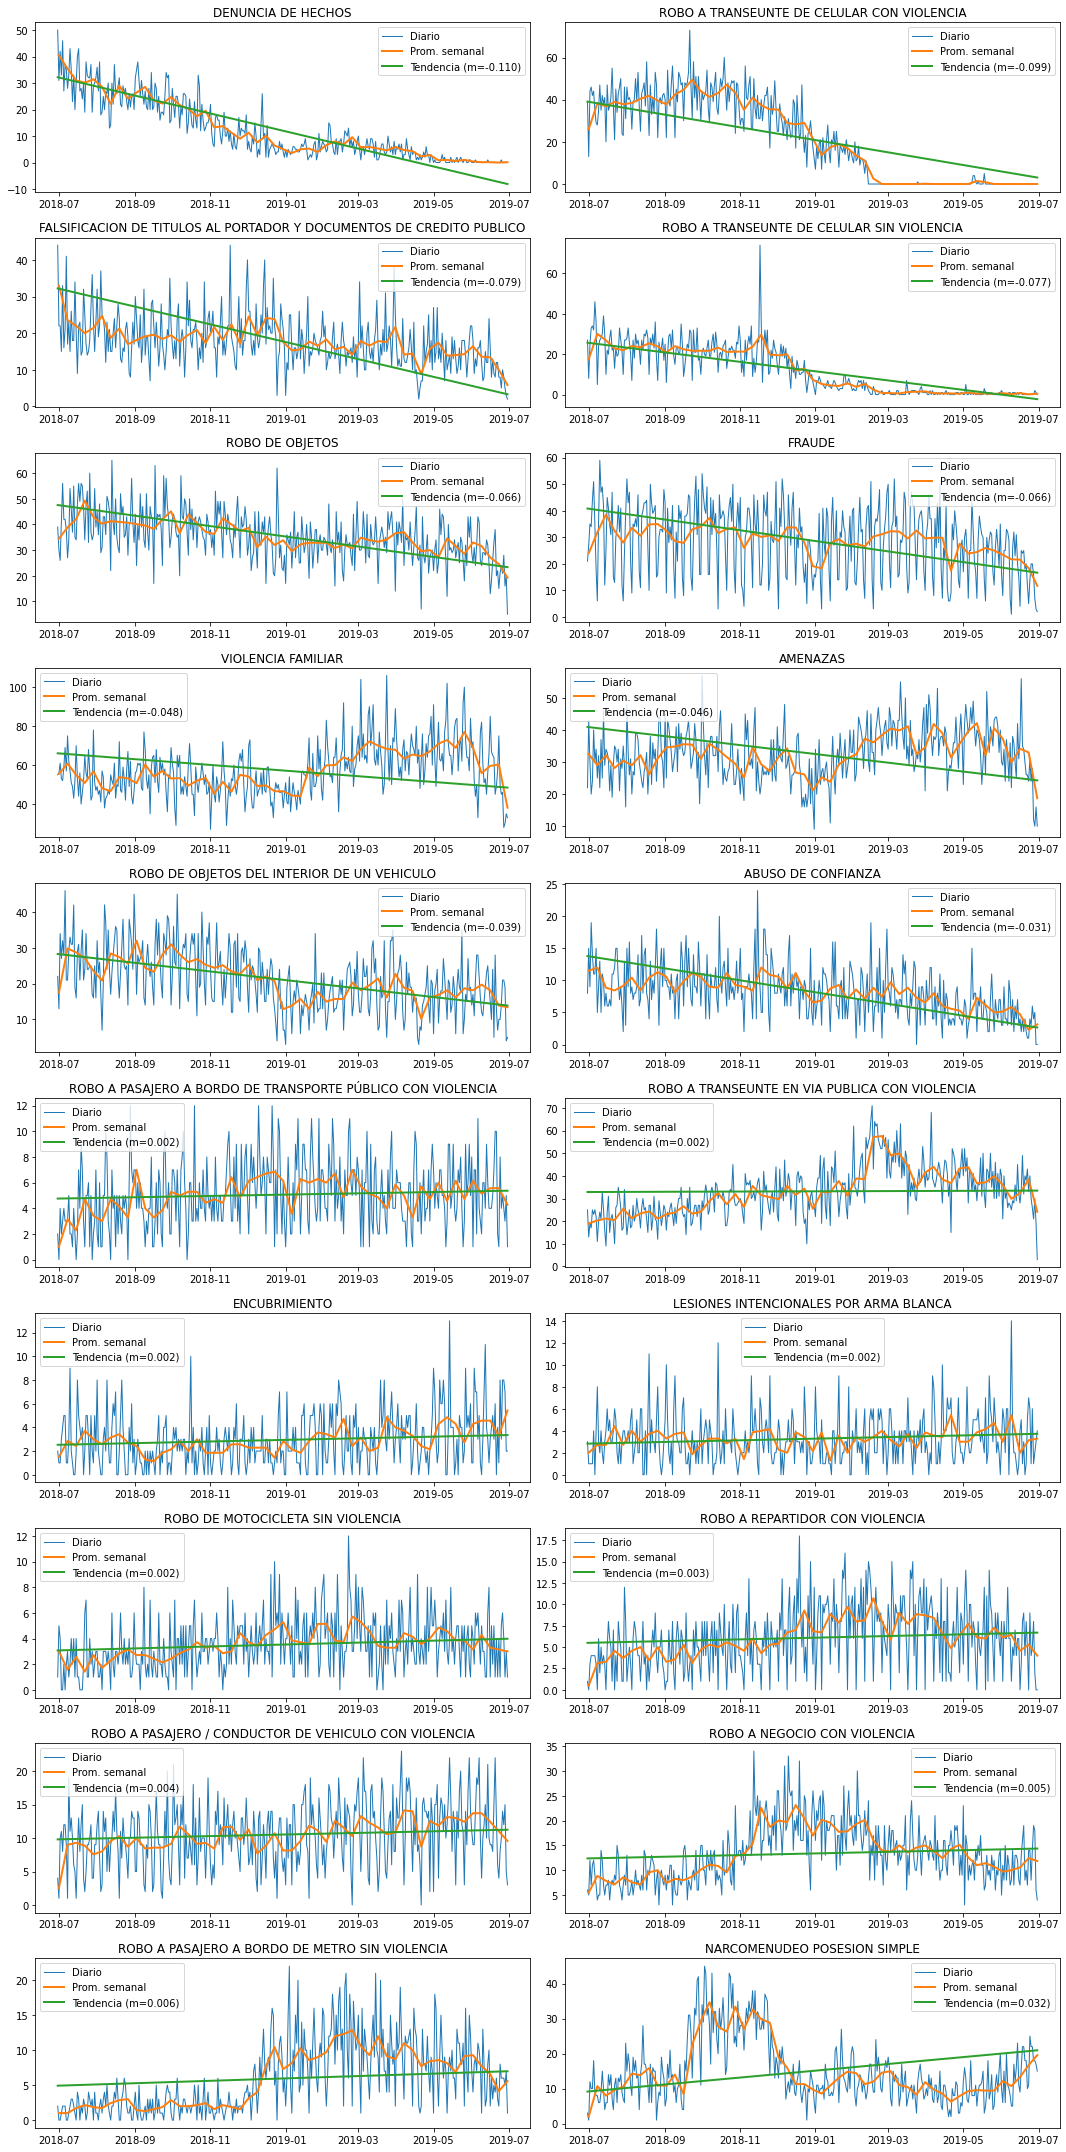

In [22]:
fig, axs = plt.subplots(10, 2, figsize=(15,30))

for i, ax in enumerate(axs.flatten()):
    
    ax.plot(
        st_por_delito_df[
            top_bottom_tend_df.index[i]
        ],
        linewidth=1,
        label='Diario'
    )
    ax.plot(
        st_por_delito_df[
            top_bottom_tend_df.index[i]
        ].resample('W').mean(),
        linewidth=2,
        label='Prom. semanal'
    ),
    ax.plot(
        tendencias[
            top_bottom_tend_df.index[i]
        ][:-60],
        linewidth=2,
        label='Tendencia (m={:.3f})'.format(
            top_bottom_tend_df.iloc[i, 2]   
        )
    );
    ax.set_title(
        top_bottom_tend_df.index[i]
    )
    ax.legend()

fig.tight_layout()
plt.show()
plt.close()

## 5. ¿Cuál es la alcaldía que más delitos tiene y cuál es la que menos?. ¿Por qué crees que sea esto?

El número de delitos por alcaldía está dado por `del_tot_alcaldia_df`. Así, las alcaldías con mayor y menor incidencia de delitos son

In [23]:
pd.concat(
    [
        del_tot_alcaldia_df.head(1),
        del_tot_alcaldia_df.tail(1)
    ]
)

,no_delitos
alcaldia_hechos,
CUAUHTEMOC,131397
MILPA ALTA,5159


Diversas razones pueden explicar este hecho. Por ejemplo:
 * El primer cuadro de la ciudad se encuentra en la delegación Cuahutémoc, mientras que Milpa Alta es la alcaldía menos poblada de la CDMX (fuente: [INEGI](http://www.cuentame.inegi.org.mx/monografias/informacion/df/territorio/div_municipal.aspx?tema=me&e=09)). 
 * El índice de desarrollo social de la alcaldía Cuahutémoc está entre 0.8 y 0.9; el de Milpa Alta entre 0.6 y 0.7 (fuente: [Nexos](https://economia.nexos.com.mx/?p=894)), lo que indica una gran diferencia en la actividad económica de cada alcaldía.
 * El índice Gini de la alcaldía Cuahutémoc según el Censo de Población y Vivienda 2010 fue de 0.446, mientras que el de Milpa Alta fue de 0.404 (el segundo más bajo de la CDMX), lo que indica mayor desigualdad en la primera (fuente: [CONEVAL](https://www.coneval.org.mx/coordinacion/entidades/DistritoFederal/Paginas/desigualdad.aspx))
 * El acceso a la procuración de justicia en la alcaldía Cuahutémoc puede ser mucho mayor que el de Milpa Alta, lo que genera un menor número de denuncias en la segunda.

## 6. Dentro de cada alcaldía, ¿cuáles son las tres colonias con más delitos?

Primero agrupamos el número de delitos por alcaldía y colonia, y las ordenamos por mayor número de delitos.

In [24]:
tot_del_alcaldia_col_df = pd.DataFrame(
    df[['alcaldia_hechos', 'colonia_hechos']].groupby(['alcaldia_hechos','colonia_hechos']).size()
).rename(columns={0: 'tot_delitos'}).sort_values(
    by = ['alcaldia_hechos', 'tot_delitos'],
    ascending = [True, False]
)

Posteriormente, escogemos las 3 primeras colonias de cada una.

In [25]:
tot_del_alcaldia_col_df.groupby(level=0).head(3)

tot_delitos
alcaldia_hechos        colonia_hechos                               
ALVARO OBREGON         JARDINES DEL PEDREGAL                    2335
                       SAN ANGEL                                2019
                       ZEDEC SANTA FE                           1843
AZCAPOTZALCO           EL ROSARIO                               2820
                       INDUSTRIAL VALLEJO                       1930
                       CENTRO DE AZCAPOTZALCO                   1796
BENITO JUAREZ          DEL VALLE CENTRO                        12644
                       NARVARTE                                 9317
                       PORTALES SUR                             4587
COYOACAN               PEDREGAL DE SANTO DOMINGO                4434
                       AJUSCO                                   2377
                       DEL CARMEN                               2348
CUAJIMALPA DE MORELOS  CUAJIMALPA                               1693
                       LOMAS DE SANTA FE                        1655
                       SAN JOSÉ DE LOS CEDROS                   1008
CUAUHTEMOC             CENTRO                                  28751
                       DOCTORES                                16657
                       ROMA NORTE                              10403
GUSTAVO A MADERO       LINDAVISTA                               3737
                       GUADALUPE TEPEYAC                        3208
                       SAN FELIPE DE JESÚS                      2284
IZTACALCO              AGRÍCOLA ORIENTAL                        6663
                       AGRÍCOLA PANTITLAN                       5476
                       GRANJAS MÉXICO                           3604
IZTAPALAPA             CENTRAL DE ABASTO                        5264
                       LOMAS DE SAN LORENZO                     3060
                       DESARROLLO URBANO QUETZALCOATL           2990
LA MAGDALENA CONTRERAS SAN JERÓNIMO LÍDICE                      1452
                       SAN NICOLÁS TOTOLAPAN                    1008
                       SAN BERNABÉ OCOTEPEC                      672
MIGUEL HIDALGO         POLANCO                                  7131
                       ANAHUAC                                  3796
                       LOMAS DE CHAPULTEPEC I SECCIÓN           3196
MILPA ALTA             CRUZTITLA (SAN ANTONIO TECOMITL)          390
                       SANTA MARTHA (VILLA MILPA ALTA)           342
                       SAN MIGUEL (SAN PABLO OZTOTEPEC)          340
TLAHUAC                DEL MAR                                  1121
                       MIGUEL HIDALGO                           1058
                       SAN FRANCISCO TLALTENCO                   881
TLALPAN                SAN ANDRÉS TOTOLTEPEC                    3000
                       TLALPAN CENTRO I                         1832
                       HÉROES DE PADIERNA                       1798
VENUSTIANO CARRANZA    JARDÍN BALBUENA                          4464
                       MOCTEZUMA 2A SECCIÓN                     3549
                       ZONA CENTRO                              3060
XOCHIMILCO             SAN GREGORIO ATLAPULCO                   1607
                       SANTIAGO TEPALCATLALPAN                  1301
                       SANTA CRUZ ACALPIXCA - PUEBLO            1223

## 7. ¿Existe alguna tendencia estacional en la ocurrencia de delitos (mes, semana, día de la semana, quincenas)?

Como en la tendencia, podemos usar `Prophet` para calcular la estacionalidad.

In [26]:
ph_df = pd.DataFrame(
    df[
        df.index >= '2018-06-30'
    ][['delito']].resample('D').size()
).reset_index().rename(
    columns={
        'fecha_hechos': 'ds',
        0: 'y'}
)

m = Prophet(
    interval_width=0.95,
    yearly_seasonality=False,
    weekly_seasonality=True,
    daily_seasonality=False,
    changepoint_prior_scale=2,
)
m.add_seasonality(name='monthly', period=30.5, fourier_order=5, prior_scale=0.02)

m.fit(ph_df)

futuro = m.make_future_dataframe(
    periods=30,
    freq='D',
)
prediccion = m.predict(futuro)

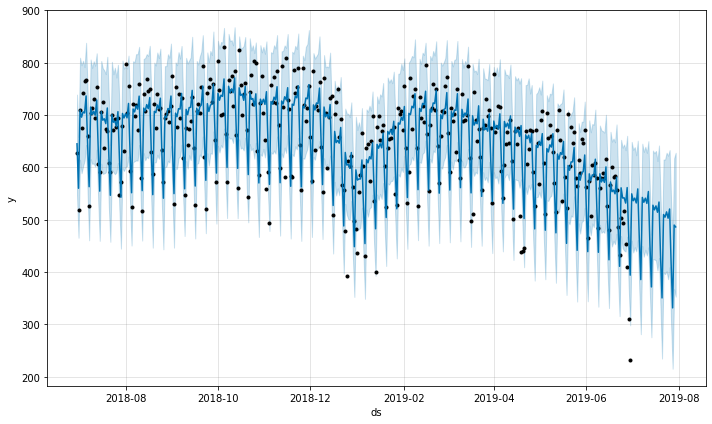

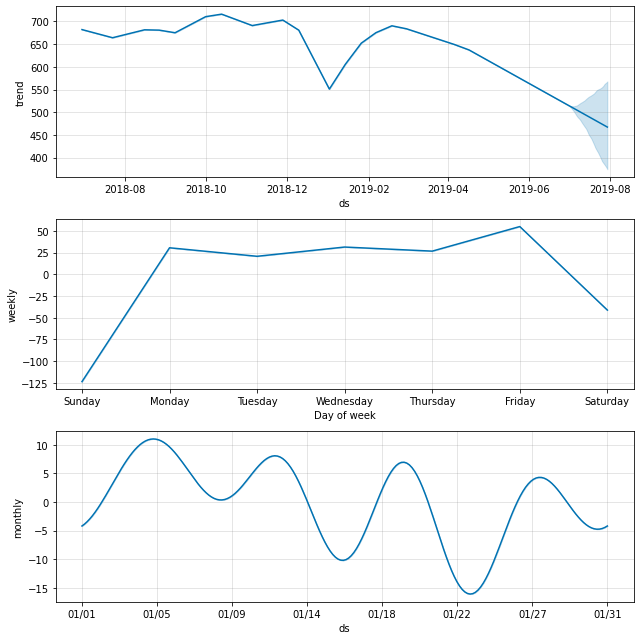

In [27]:
m.plot(prediccion);
m.plot_components(prediccion);

Parece que hay una estacionalidad de 12 días, aproximadamente. También podemos ver que los delitos en general bajan el fin de semana.

## 8. ¿Cuales son los delitos que más caracterizan a cada alcaldía? Es decir, delitos que suceden con mayor frecuencia en una alcaldía y con menor frecuencia en las demás.

Podemos tener una idea visual de los delitos que caracterizan a cada alcaldía con un mapa de calor. A continuación construimos un mapa de 16 x 16 donde se encuentran los 16 delitos más frecuentes con respecto a cada alcaldía. Del mapa es claro, por ejemplo, que en Iztapalapa ocurren la mayoría de los casos de violencia familiar.

In [28]:
import seaborn as sns

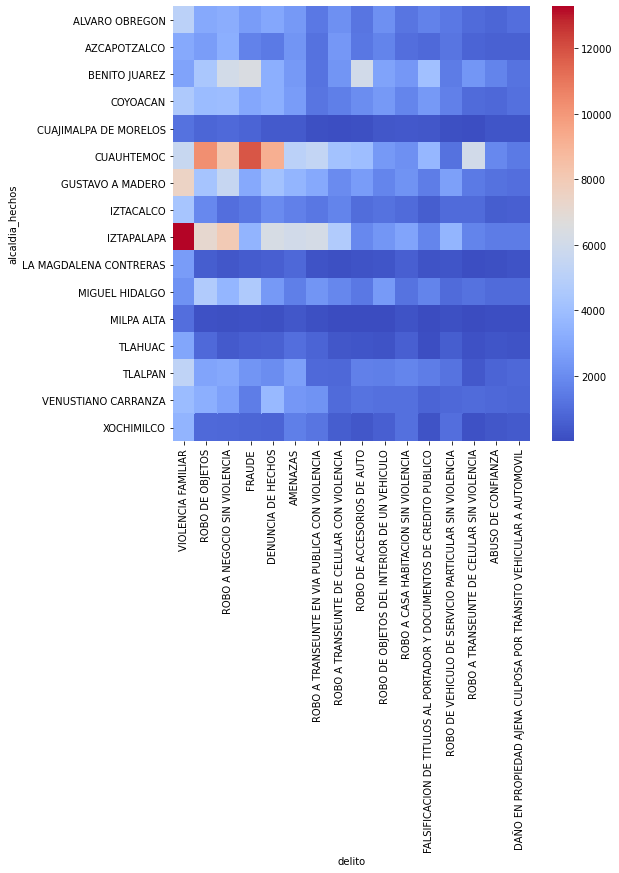

In [29]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(tot_del_alcaldia_del, ax=ax, cmap='coolwarm')
ax.plot()
plt.show()
plt.close()

Ahora bien, la escala del mapa no nos deja ver bien qué está pasando. Una solución es escalar cada columna.

In [30]:
tot_del_alcaldia_del_norm = tot_del_alcaldia_del.apply(lambda x: x/x.max(), axis=0)

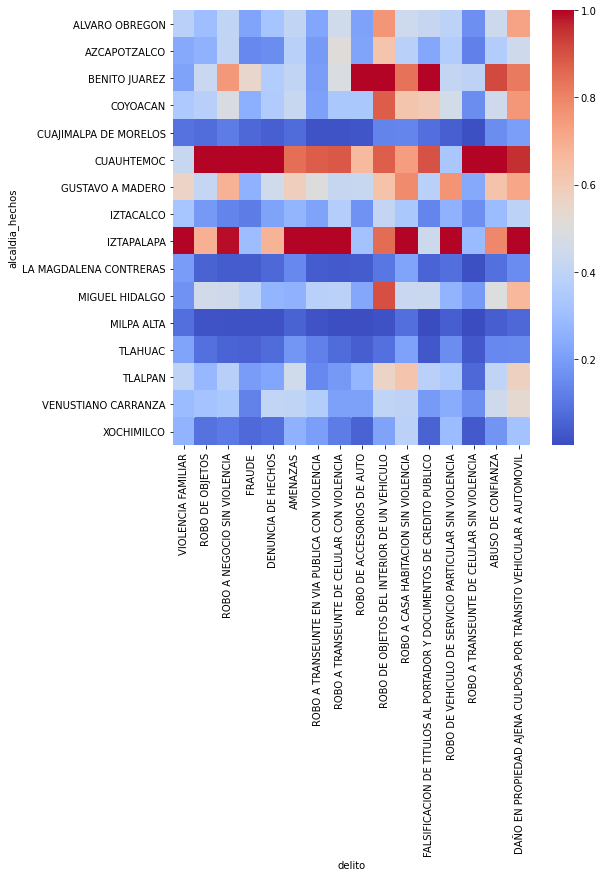

In [31]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(tot_del_alcaldia_del_norm, ax=ax, cmap='coolwarm')
ax.plot()
plt.show()
plt.close()

Así, podemos ver que Iztapalapa se caracteriza por la violencia familiar, mientras que Benito Juárez por robo a negocio sin violencia y robo de objetos del interior de un vehículo; Tlalpan, por ejemplo, se caracteriza por robo a casa habitación sin violencia, pero en general es bastante segura con respecto a otras alcaldías.
También podemos mirar el mapa con respecto a las alcaldías.

In [32]:
tot_del_del_alcaldia_norm = tot_del_alcaldia_del.apply(lambda x: x/x.max(), axis=1)

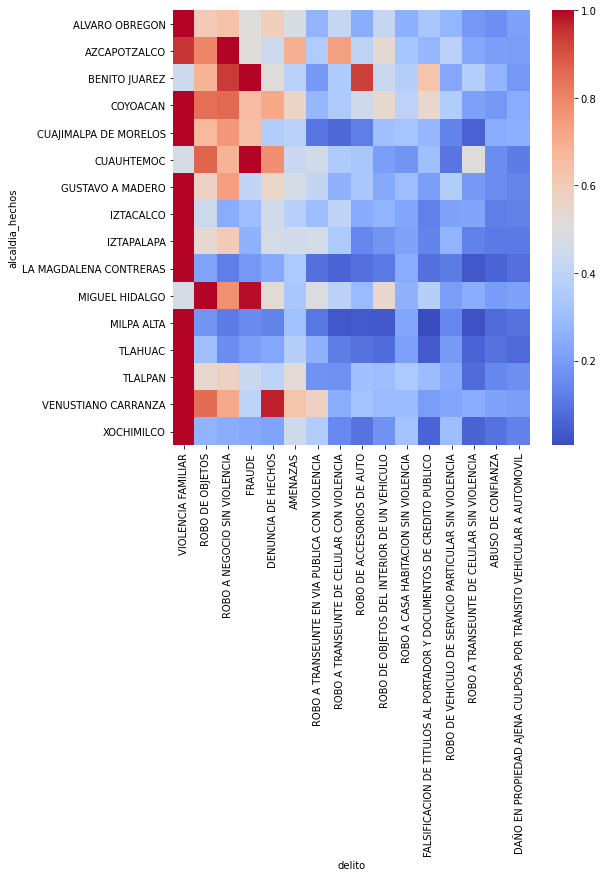

In [33]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(tot_del_del_alcaldia_norm, ax=ax, cmap='coolwarm')
ax.plot()
plt.show()
plt.close()

De este modo, podemos ver que todas las alcaldías se caracterizan por la violencia familiar, y que en Benito Juárez el robo de accesorios de auto es significativo.

Si queremos ver los delitos de menor incidencia, solo tenemos que normalizar al revés.

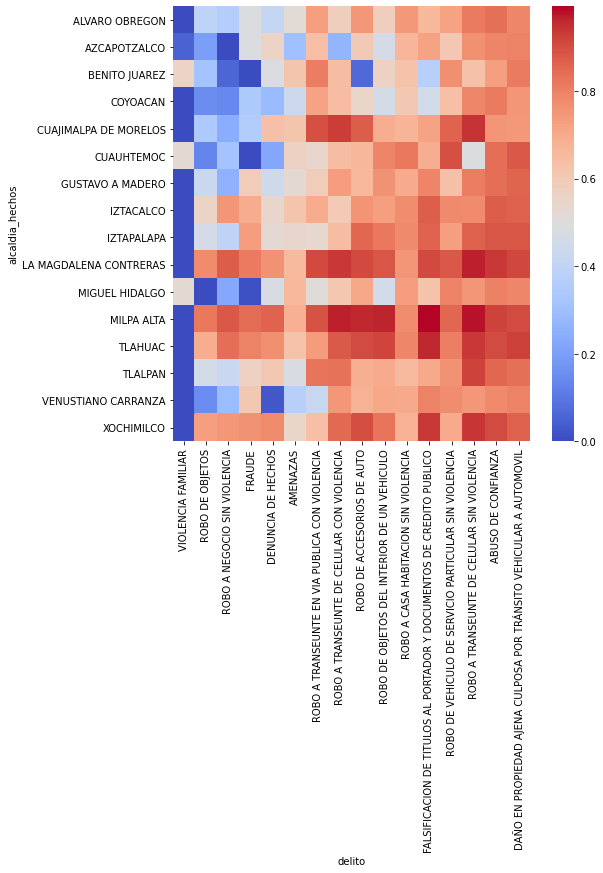

In [34]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(
    1 - tot_del_alcaldia_del.apply(lambda x: x/x.max(), axis=1),
    ax=ax,
    cmap='coolwarm'
)
ax.plot()
plt.show()
plt.close()

Con esta inversión nos podemos dar cuenta de en Milpa alta, casi no se falsifican títulos al portador.

## 9. Calcula el número de homicidios dolosos por cada 100 mil habitantes anual para cada Área Geoestadística Básica (AGEB) del INEGI.

A continuación obtenemos las AGEB del INEGI y construimos un `GeoDataFrame`.

In [35]:
import zipfile
if not os.path.exists('scince_cdmx.zip'):
    wget.download(
        'https://www.inegi.org.mx/contenidos/masiva/indicadores/inv/09_SCINCE_zip.zip',
        'scince_cdmx.zip'
    )
        
if not os.path.exists('scince_cdmx'):
    zipfile.ZipFile('scince_cdmx.zip').extractall('scince_cdmx')

In [223]:
import geopandas as gpd
ageb_gdf =gpd.read_file('scince_cdmx/09/ageb_urb.shp')[['CVEGEO', 'POB1', 'geometry']]

INFO:fiona.ogrext:Failed to auto identify EPSG: 7


In [37]:
display(ageb_gdf)

,CVEGEO,POB1,geometry
0,0900200010010,3424,"POLYGON ((2792673.309 837911.475, 2792661.677 ..."
1,0900200010025,5912,"POLYGON ((2793350.823 837765.350, 2793352.857 ..."
2,090020001003A,4638,"POLYGON ((2792311.179 837633.517, 2792359.899 ..."
3,0900200010044,5007,"POLYGON ((2792448.207 837485.647, 2792448.126 ..."
4,0900200010097,2260,"POLYGON ((2792415.239 836846.390, 2792356.808 ..."
...,...,...,...
2427,0901700011488,1257,"POLYGON ((2807909.927 828694.963, 2807906.478 ..."
2428,0901700011492,1013,"POLYGON ((2807909.927 828694.963, 2808056.201 ..."
2429,0901700011505,2741,"POLYGON ((2807731.174 828676.619, 2807845.630 ..."
2430,090170001151A,2352,"POLYGON ((2807574.924 828548.893, 2807544.836 ..."


Para poder hacer la agrupación geográfica, transformamos los datos de delitos en un `gdf`.

In [38]:
hd_df = df[
    df['categoria_delito'] == 'HOMICIDIO DOLOSO'
].dropna(subset=['longitud', 'latitud'])
hd_gdf = gpd.GeoDataFrame(
    hd_df,
#     crs={'init': 'epsg:4326'},
    geometry=gpd.points_from_xy(
        hd_df['longitud'], hd_df['latitud']
    )
)

Posteriormente los unimos de manera izquierda, para no perder AGEBS.

In [39]:
ageb_hd_gdf = gpd.sjoin(ageb_gdf.to_crs('epsg:4326'), hd_gdf.set_crs("EPSG:4326"), how='left')

In [40]:
ageb_hd_pivot = pd.pivot_table(ageb_hd_gdf,index='CVEGEO',columns='delito',aggfunc={'delito':len})
ageb_hd_pivot.columns = ageb_hd_pivot.columns.droplevel()

new_ageb_gdf = ageb_gdf.merge(ageb_hd_pivot, how='left',on='CVEGEO').fillna(0)

In [41]:
new_ageb_gdf['TOTAL HOMICIDIO DOLOSO'] = new_ageb_gdf[
    df[
        df['categoria_delito'] == 'HOMICIDIO DOLOSO'
    ]['delito'].unique()
].sum(axis=1)

Con nuestro `gdf` listo, calculamos el número de homicidios dolosos por cada 100 mil habitantes en el periodo comprendido entre el 30-06-2018 y el 30-06-2019.

In [42]:
new_ageb_gdf['TOTAL x 100,000 HAB'] = new_ageb_gdf[
    ['CVEGEO', 'TOTAL HOMICIDIO DOLOSO']
].apply(
    lambda x: x['TOTAL HOMICIDIO DOLOSO']/10000,
    axis=1
)
display(
    new_ageb_gdf.sort_values(
        by='TOTAL x 100,000 HAB',
        ascending=False
    )
)

,CVEGEO,POB1,geometry,FEMINICIDIO,HOMICIDIO POR AHORCAMIENTO,HOMICIDIO POR ARMA BLANCA,HOMICIDIO POR ARMA DE FUEGO,HOMICIDIO POR GOLPES,HOMICIDIOS INTENCIONALES (OTROS),TOTAL HOMICIDIO DOLOSO,"TOTAL x 100,000 HAB"
2301,0901700010210,13391,"POLYGON ((2801362.962 830171.728, 2801293.428 ...",0.0,0.0,4.0,29.0,2.0,0.0,35.0,0.0035
2031,0901500010358,9428,"POLYGON ((2800636.964 830519.820, 2800685.685 ...",0.0,0.0,1.0,21.0,1.0,6.0,29.0,0.0029
2030,0901500010343,10606,"POLYGON ((2800636.964 830519.820, 2800626.469 ...",0.0,0.0,7.0,16.0,3.0,3.0,29.0,0.0029
880,0900700012475,0,"POLYGON ((2805711.030 822465.069, 2805667.943 ...",0.0,0.0,3.0,10.0,2.0,2.0,17.0,0.0017
2050,0901500010540,7546,"POLYGON ((2799960.453 830701.143, 2799975.199 ...",0.0,0.0,4.0,10.0,2.0,1.0,17.0,0.0017
...,...,...,...,...,...,...,...,...,...,...,...
1713,0901200011994,3272,"POLYGON ((2803814.355 814118.921, 2803802.743 ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
262,0900400010072,3412,"POLYGON ((2783723.314 821803.343, 2783761.348 ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
1042,0900700014611,820,"POLYGON ((2808542.303 822687.552, 2808587.651 ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
1041,0900700014594,1096,"POLYGON ((2808512.168 822843.489, 2808463.752 ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000


Ahora podemos generar un mapa geográfico que refleje los homicidios dolosos por AGEB.

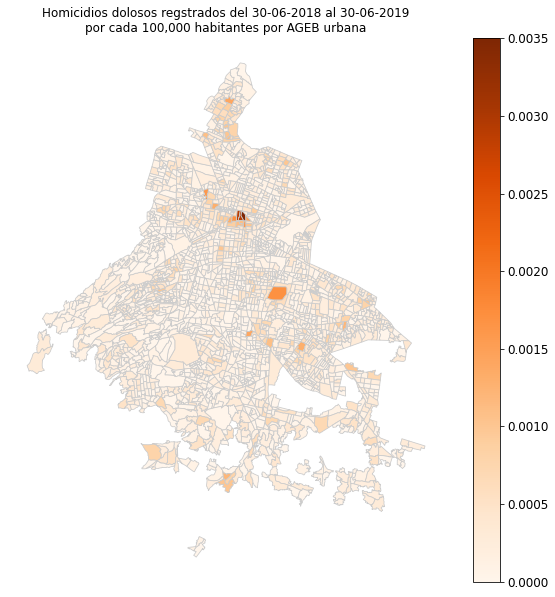

In [43]:
# new_ageb_gdf.plot(figsize=(24,12))
# plt.show()
hmin = new_ageb_gdf['TOTAL x 100,000 HAB'].max()
hmax = new_ageb_gdf['TOTAL x 100,000 HAB'].min()
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title(
    'Homicidios dolosos regstrados del 30-06-2018 al 30-06-2019\npor cada 100,000 habitantes por AGEB urbana',
    fontdict={'fontsize': '12', 'fontweight' : '2'}
)
sm = plt.cm.ScalarMappable(
    cmap='Oranges',
    norm=plt.Normalize(vmin=hmin, vmax=hmax)
)
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=12)
new_ageb_gdf.plot(
    'TOTAL HOMICIDIO DOLOSO',
    cmap='Oranges',
    linewidth=0.8,
    ax=ax,
    edgecolor='0.8',
    figsize=(10,10)
)
plt.show()

## 10. ¿Cómo diseñarías un indicador que midiera el nivel “inseguridad”?

En este caso, vamos a usar las AGEB, pero podríamos usar otra granularidad. Primero, veamos la clasificación de delitos:

In [44]:
display(
    df[['categoria_delito']].groupby(['categoria_delito']).size()
)

categoria_delito
DELITO DE BAJO IMPACTO                                     629455
HECHO NO DELICTIVO                                          52158
HOMICIDIO DOLOSO                                             4230
LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO                5995
ROBO A CASA HABITACIÓN CON VIOLENCIA                         1836
ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON VIOLENCIA      1404
ROBO A NEGOCIO CON VIOLENCIA                                11548
ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN VIOLENCIA      2838
ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA                 734
ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIOLENCIA        5484
ROBO A REPARTIDOR CON Y SIN VIOLENCIA                        7207
ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA        33270
ROBO A TRANSPORTISTA CON Y SIN VIOLENCIA                      414
ROBO DE VEHÍCULO CON Y SIN VIOLENCIA                        41227
SECUESTRO                                                  

Tenemos 16 categorías tan diferentes como `HOMICIDIO DOLOSO` o `DELITO DE BAJO IMPACTO`; adicionalmente, la segunda ocurre mucho más a menudo que la primera, por lo que pesarlas igual sería un equívoco. Así, vamos a agrupar las categorías en 3 (alto impacto, impacto medio y bajo impacto) y a construir un peso para cada categoría, de tal manera que el indicador sea un vector en 3 dimensiones cuya norma refleje el indicador.

In [45]:
def indice_inseguridad(delitos_clasificados,
                       peso={'alta': 100, 'media': 10, 'baja': 1}):
    """
        Recibe un diccionario de 3 elementos con el número de delitos
        por categoría, e.g.:
        
        >>>{'alta': 2, 'media': 10, 'baja': 150}
        
        Devuelve un diccionario con el vector generado al multiplicar
        el número de elementos por el peso correspondiente, junto con
        su norma. Los valores por defecto son escala logarítmica.
        
        >>> indice_inseguridad({'alta': 2, 'media': 10, 'baja': 150})
        >>> {'alta': 200, 'media': 100, 'baja': 150, 'norma': 269.2582403567252}
            
    """
    vector_delitos = {}
    norma_2 = 0
    for key, value in delitos_clasificados.items():
        vector_delitos[key] = peso[key] * value
        norma_2 += vector_delitos[key] ** 2
        
    vector_delitos['norma'] = norma_2 ** (1/2)
    
    return vector_delitos  

Una vez definido el indicador, determinamos cómo vamos a clasificar los delitos. Personalmente, me gustaría separar los delitos violentos de los no violentos, pero por ahora trabajaremos con las categorías establecidas de la siguiente forma:

In [46]:
helper_dic = {
    'alta': [
        'HOMICIDIO DOLOSO',
        'LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO',
        'SECUESTRO',
        'VIOLACIÓN'
    ],
    'media': [
        'LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO',
        'ROBO A CASA HABITACIÓN CON VIOLENCIA ',
        'ROBO A CASA HABITACIÓN CON VIOLENCIA',
        'ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON VIOLENCIA',
        'ROBO A NEGOCIO CON VIOLENCIA',
        'ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN VIOLENCIA',
        'ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA ',
        'ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA',
        'ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIOLENCIA',
        'ROBO A REPARTIDOR CON Y SIN VIOLENCIA',
        'ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA',
        'ROBO A TRANSPORTISTA CON Y SIN VIOLENCIA',
        'ROBO DE VEHÍCULO CON Y SIN VIOLENCIA'
    ],
    'baja': [
        'DELITO DE BAJO IMPACTO',
        'HECHO NO DELICTIVO'
    ]
}

clas_delito = {}
for key, value in helper_dic.items():
    for v in value:
        clas_delito.setdefault(v, key)

Con la nueva clasificación y el nuevo índice, podemos agregar el indicador a nuestro `gdf`.

In [47]:
class_df = df.dropna(subset=['longitud', 'latitud']).copy()
class_df['clas_delito'] = class_df[['categoria_delito']].apply(
    lambda x:
        clas_delito[x[0]],
    axis=1
)

class_gdf = gpd.GeoDataFrame(
    class_df,
    geometry=gpd.points_from_xy(
        class_df['longitud'], class_df['latitud']
    )
)

class_ageb_gdf = gpd.sjoin(ageb_gdf.to_crs('epsg:4326'), class_gdf.set_crs("EPSG:4326"), how='left')

class_ageb_pivot = pd.pivot_table(
    class_ageb_gdf,
    index='CVEGEO',
    columns='clas_delito',
    aggfunc={'clas_delito':len}
)
class_ageb_pivot.columns = class_ageb_pivot.columns.droplevel()

final_clas_ageb_gdf = ageb_gdf.merge(class_ageb_pivot, how='left',on='CVEGEO').fillna(0)

In [48]:
final_clas_ageb_gdf = ageb_gdf.merge(class_ageb_pivot, how='left',on='CVEGEO').fillna(0)

final_clas_ageb_gdf['idx_inseguridad'] = final_clas_ageb_gdf.apply(
    lambda x:
        indice_inseguridad(
            {
                'baja': x['baja'],
                'media': x['media'],
                'alta': x['alta'],
            }
        )['norma'],
    axis = 1
)

In [49]:
max_idx_inseguridad = final_clas_ageb_gdf[['idx_inseguridad']].max()
final_clas_ageb_gdf[['idx_inseguridad_norm']]= final_clas_ageb_gdf[
    ['idx_inseguridad']
].apply(
    lambda x: x/max_idx_inseguridad,
    axis = 1,
)

In [50]:
final_clas_ageb_gdf[['idx_inseguridad']].max()

idx_inseguridad    7614.496963
dtype: float64

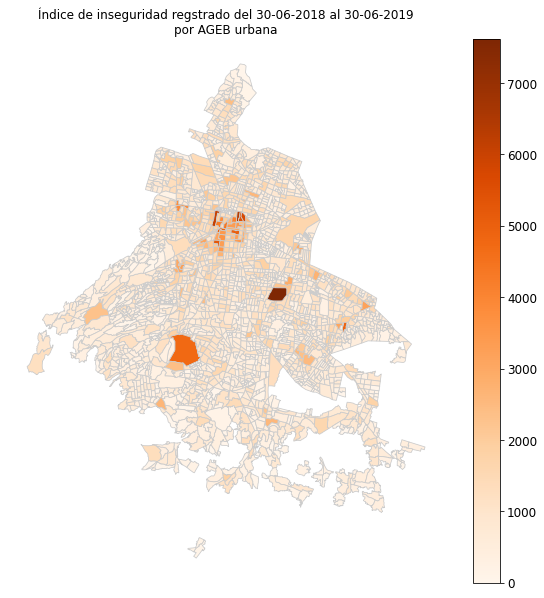

In [51]:
# new_ageb_gdf.plot(figsize=(24,12))
# plt.show()
hmin = final_clas_ageb_gdf[['idx_inseguridad']].min()
hmax = final_clas_ageb_gdf[['idx_inseguridad']].max()
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title(
    'Índice de inseguridad regstrado del 30-06-2018 al 30-06-2019\npor AGEB urbana',
    fontdict={'fontsize': '12', 'fontweight' : '2'}
)
sm = plt.cm.ScalarMappable(
    cmap='Oranges',
    norm=plt.Normalize(vmin=hmin, vmax=hmax)
)
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=12)
final_clas_ageb_gdf.plot(
    'idx_inseguridad',
    cmap='Oranges',
    linewidth=0.8,
    ax=ax,
    edgecolor='0.8',
    figsize=(10,10)
)
plt.show()

Evidentemente, podemos mover los parámetros o el impacto para obtener un mejor indicador. Esto se podría hacer con ayuda de `ML`.

Por ejemplo, podemos tomar un perceptrón introduzca el número de delitos por `categoria_delito` en `t_0` y entrenarlo para que prediga el total de delitos en `t_1`. Posteriormente considerar los pesos de la red y usarlos para definir el índice de inseguridad.

## 11. Con alguna de las medidas de crimen que calculaste en los incisos anteriores, encuentra patrones de concentración geográfica de delitos.

Para establecer concentración geográfica de los delitos, vamos a usar el algoritmo [`DBSCAN`](https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html). POr simplicidad, solo utilizaremos `categoria_delito`, pero este procedimiento se puede generalizar sin ningún problema.

In [64]:
dbscan_ready_df = df[
    ['longitud', 'latitud', 'categoria_delito']
].dropna(
    subset=['longitud', 'latitud']
).pivot_table(
    index=['longitud', 'latitud'],
    columns=['categoria_delito'],
    values=['categoria_delito'],
    aggfunc=len
).fillna(0).reset_index()

display(dbscan_ready_df)

categoria_delito,longitud,latitud,DELITO DE BAJO IMPACTO,HECHO NO DELICTIVO,HOMICIDIO DOLOSO,LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO,ROBO A CASA HABITACIÓN CON VIOLENCIA,ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON VIOLENCIA,ROBO A NEGOCIO CON VIOLENCIA,ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN VIOLENCIA,ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA,ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIOLENCIA,ROBO A REPARTIDOR CON Y SIN VIOLENCIA,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA,ROBO A TRANSPORTISTA CON Y SIN VIOLENCIA,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,SECUESTRO,VIOLACIÓN
0,-99.342765,19.309007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-99.341311,19.308229,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-99.341172,19.303706,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-99.341141,19.308421,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-99.341097,19.303647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
614938,-98.948126,19.224828,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
614939,-98.947609,19.225288,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
614940,-98.947138,19.225228,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
614941,-98.946991,19.225158,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Para nuestro cálculo son demasiadas entradas, por lo que lo vamos a agrupar por AGEP y posteriormente hacer el clustering.

In [65]:
cat_df = df[['longitud', 'latitud', 'categoria_delito']].dropna(subset=['longitud', 'latitud']).copy()

cat_df.rename(
    columns={'longitud': 'xm', 'latitud': 'ym'},
    inplace=True
)

cat_gdf = gpd.GeoDataFrame(
    cat_df,
    geometry=gpd.points_from_xy(
        cat_df['xm'], cat_df['ym']
    )
)

cat_ageb_gdf = gpd.sjoin(ageb_gdf.to_crs('epsg:4326'), cat_gdf.set_crs("EPSG:4326"), how='left')

cat_ageb_pivot = pd.pivot_table(
    cat_ageb_gdf,
    index='CVEGEO',
    columns='categoria_delito',
    aggfunc={'categoria_delito':len}
)
cat_ageb_pivot.columns = cat_ageb_pivot.columns.droplevel()

final_cat_ageb_gdf = ageb_gdf.merge(cat_ageb_pivot, how='left',on='CVEGEO').fillna(0)

In [66]:
final_cat_ageb_gdf = ageb_gdf.merge(cat_ageb_pivot, how='left',on='CVEGEO').fillna(0)

final_cat_ageb_gdf['centroids'] = final_cat_ageb_gdf[['geometry']].centroid
final_cat_ageb_gdf['x'] = final_cat_ageb_gdf['centroids'].x
final_cat_ageb_gdf['y'] = final_cat_ageb_gdf['centroids'].y

In [121]:
dbscan_ready_df = final_cat_ageb_gdf[
    ['x', 'y'] + list(df['categoria_delito'].unique())
].copy()
dbscan_ready_df_tmp = dbscan_ready_df.copy()

In [122]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler

In [123]:
dbscan_ready_df_tmp = StandardScaler().fit_transform(
    dbscan_ready_df_tmp
)

In [124]:
db = DBSCAN(eps=0.5, min_samples=5).fit(dbscan_ready_df_tmp)
labels = db.labels_
dbscan_ready_df['cluster'] = labels

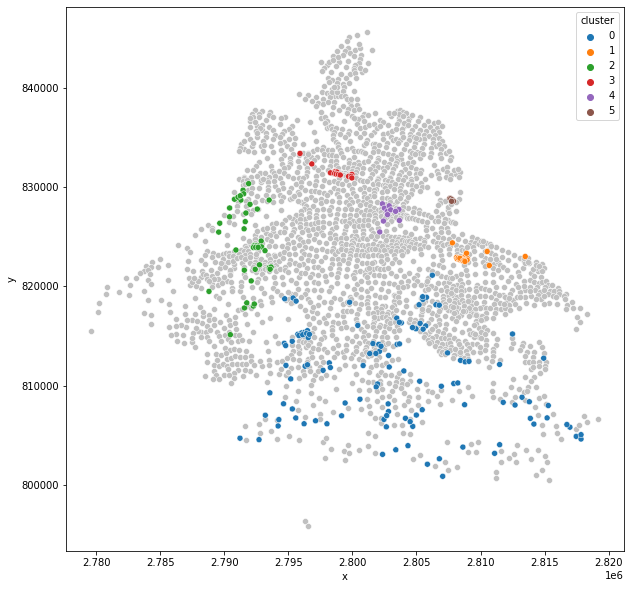

In [127]:
fig, ax = plt.subplots(1, figsize=(10, 10))

sns.scatterplot(
    data=dbscan_ready_df[
        dbscan_ready_df['cluster'] == -1
    ],
    x='x', y='y', ax=ax,
    color = 'silver'
)
sns.scatterplot(
    data=dbscan_ready_df[
        dbscan_ready_df['cluster'] > -1
    ],
    x='x', y='y', ax=ax,
    hue='cluster',
    palette="tab10"
)
plt.show()
plt.close()

Podemos ver algo de clustering, pero no demasiado. Veamos qué pasa si trabajamos con nuestro índice.

In [131]:
clas_dbscan_ready_df = final_clas_ageb_gdf[['geometry', 'alta', 'media', 'baja']].copy()

clas_dbscan_ready_df['centroids'] = clas_dbscan_ready_df[['geometry']].centroid
clas_dbscan_ready_df['x'] = clas_dbscan_ready_df['centroids'].x
clas_dbscan_ready_df['y'] = clas_dbscan_ready_df['centroids'].y

clas_dbscan_ready_df_tmp = clas_dbscan_ready_df[['x', 'y', 'alta', 'media', 'baja']].copy()

In [132]:
clas_dbscan_ready_df_tmp = StandardScaler().fit_transform(
    clas_dbscan_ready_df_tmp
)

In [133]:
db = DBSCAN(eps=0.3, min_samples=15).fit(clas_dbscan_ready_df_tmp)
labels = db.labels_
clas_dbscan_ready_df['cluster'] = labels

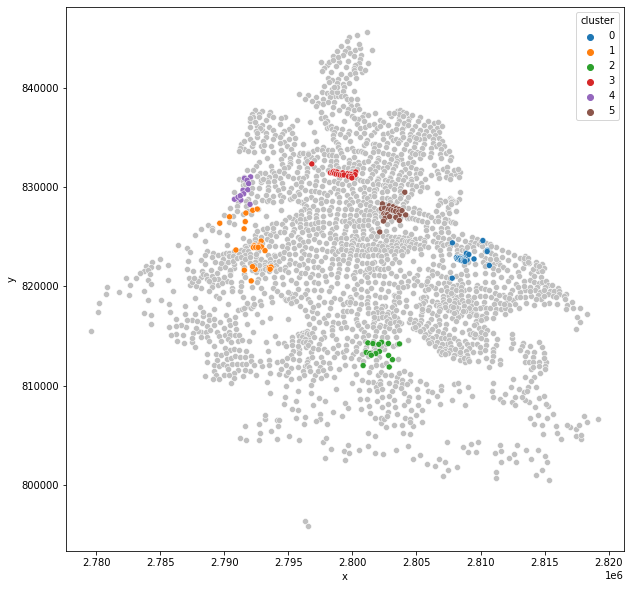

In [134]:
fig, ax = plt.subplots(1, figsize=(10, 10))

sns.scatterplot(
    data=clas_dbscan_ready_df[
        clas_dbscan_ready_df['cluster'] == -1
    ],
    x='x', y='y', ax=ax,
    color = 'silver'
)
sns.scatterplot(
    data=clas_dbscan_ready_df[
        clas_dbscan_ready_df['cluster'] > -1
    ],
    x='x', y='y', ax=ax,
    hue='cluster',
    palette="tab10"
)
plt.show()
plt.close()

¿Qué características tienen en común esas regiones? Estudiemos la región 5, por ejemplo.

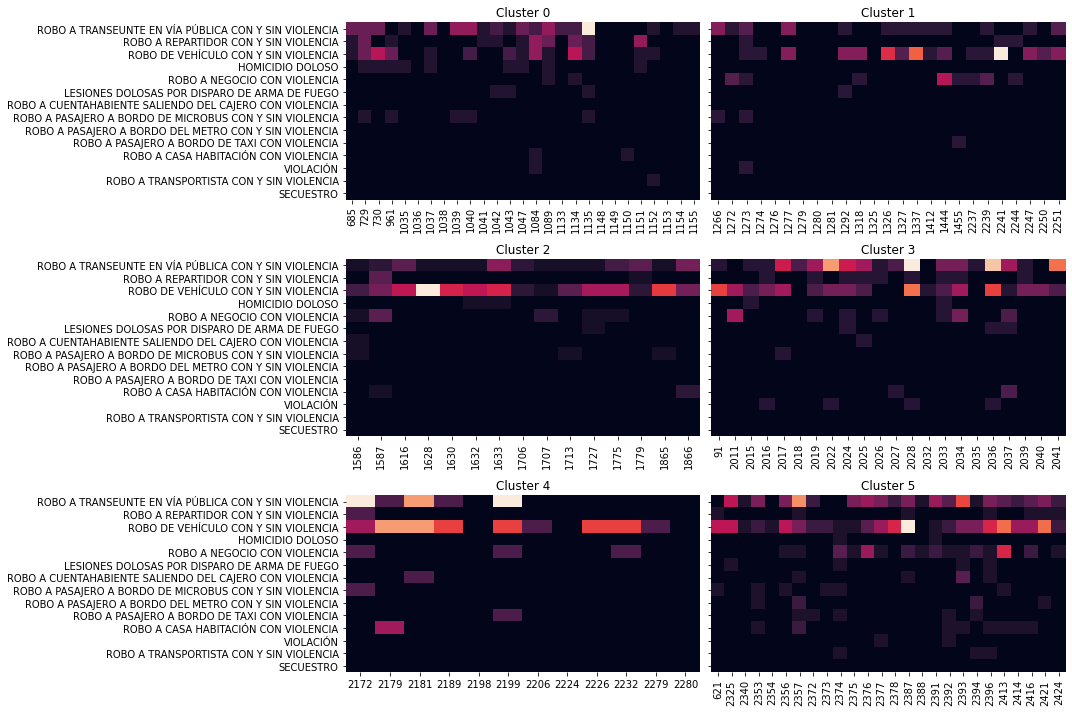

In [185]:
columnas = list(dbscan_ready_df.columns[3:-1]) ## eliminamos las cols x,y,cluster y los delitos más comunes.
columnas.pop(4)

fig, axs = plt.subplots(3, 2, figsize=(15,10), sharey=True)
for i, ax in enumerate(axs.flatten()):
    sns.heatmap(
        dbscan_ready_df.iloc[
            clas_dbscan_ready_df[
                clas_dbscan_ready_df['cluster'] == i
            ].index
        ][columnas].transpose(),
        ax=ax,
        cbar=False,
    )
    ax.set_title(
        'Cluster {}'.format(i)
    )
    ax.plot()
    
fig.tight_layout()
plt.yticks(fontsize=10)
plt.show()
plt.close()

Podemos ver que las colonias tienen *firmas* muy parecidas.

## 12. Toma los delitos clasificados como “Robo a pasajero a bordo de transporte público con y sin violencia”. ¿Cuáles son las ruta de transporte público donde más ocurren estos delitos?

Construimos un `df` que agrupe las categorías y las cuente por calle, y posteriormente calculamos el total y lo ordenamos de mayor a menor.

In [222]:
robo_a_pasajero_df = df[
    df['delito'].isin(
        [
            'ROBO A PASAJERO A BORDO DE TRANSPORTE PÚBLICO CON VIOLENCIA',
            'ROBO A PASAJERO A BORDO DE TRANSPORTE PÚBLICO SIN VIOLENCIA'
        ]
    )
][['calle_hechos', 'delito']]

In [212]:
robo_a_pasajero_pivot = robo_a_pasajero_df.pivot_table(
    index=['calle_hechos'],
    columns=['delito'],
    values=['delito'],
    aggfunc=len
).fillna(0).reset_index()

In [216]:
robo_a_pasajero_pivot['Total'] = robo_a_pasajero_pivot.apply(
    lambda x:
        x[1] + x[2],
    axis = 1
)

In [221]:
robo_a_pasajero_pivot.sort_values(by='Total', ascending=False).head(10)

delito,calle_hechos,ROBO A PASAJERO A BORDO DE TRANSPORTE PÚBLICO CON VIOLENCIA,ROBO A PASAJERO A BORDO DE TRANSPORTE PÚBLICO SIN VIOLENCIA,Total
1055,CALZADA IGNACIO ZARAGOZA,137.0,15.0,152.0
1999,PERIFERICO,43.0,10.0,53.0
83,ANILLO PERIFERICO,35.0,14.0,49.0
997,CALZ. IGNACIO ZARAGOZA,35.0,4.0,39.0
2020,PERIFERICO SUR,17.0,13.0,30.0
779,AVENIDA TLAHUAC,27.0,2.0,29.0
798,AVENIDA UNIVERSIDAD,26.0,2.0,28.0
1502,ERMITA IZTAPALAPA,24.0,3.0,27.0
541,AVENIDA CENTENARIO,23.0,4.0,27.0
1044,CALZADA ERMITA IZTAPALAPA,23.0,3.0,26.0
